In [256]:
from pathlib import Path

from experiment import Benchmark, Method, Model



In [257]:
# import numpy as np
# import torch

# torch.save(
#     [
#         torch.tensor(x) for x in np.load(
#             "/scratch/shared/beegfs/user/experiments/si/local/required-extension/permuted_mnist/seed=17/history.npy",
#             allow_pickle=True
#         )
#     ],
#     "/scratch/shared/beegfs/user/experiments/vcl/custom/results/required_extension/permuted_mnist/discriminative_naive/si_lambda=1.0/history.pth"
# )

In [258]:
model = Model.DISCRIMINATIVE_MEAN_FIELD
benchmark = Benchmark.PERMUTED_MNIST

models = {
    "VCL": (Method.VCL, None, None, [17]),
    "VCL + Random Coreset": (Method.VCL_RANDOM_CORESET, 200, False, [17]),
    "VCL + K-Center Coreset": (Method.VCL_K_CENTER_CORESET, 200, False, [17]),
  #  "Random Coreset Only": (Method.RANDOM_CORESET, 200, True, [17]),
  #  "K-center Coreset Only": (Method.K_CENTER_CORESET, 200, True, [17]),
    "EWC (lambda=100)": (Method.EWC, None, None, [17], 100.0),
    "EWC (lambda=10)": (Method.EWC, None, None, [42], 10.0),
    "EWC (lambda=1)": (Method.EWC, None, None, [17], 1.0),
    "SI (lambda=0.5)": (Method.SI, None, None, [17], 0.5),
}

accs = {}

In [259]:
import torch



for (display_name, (method, coreset_size, coreset_balanced, plot_seeds, *lam)) in models.items():


  if "coreset" in method:
      assert coreset_size is not None
      method_name = f"{method}_coreset_size={coreset_size}_coreset_balanced={coreset_balanced}"
  elif "ewc" in method:
      experiment_path = Path(
        "/scratch/shared/beegfs/user/experiments/vcl/custom/results/required_extension/permuted_mnist/discriminative_naive/"
      )
      method_name = f"{method}_lambda={lam[0]}"
  elif "si" in method:
      experiment_path = Path(
        "/scratch/shared/beegfs/user/experiments/vcl/custom/results/required_extension/permuted_mnist/discriminative_naive/"
      )
      method_name = f"{method}_lambda={lam[0]}"
  else:
      experiment_path = Path(
        "/scratch/shared/beegfs/user/experiments/vcl/custom/results/required_extension/permuted_mnist/discriminative_mean_field/"
      )
      method_name = method


  method_histories = [
      experiment_path /  method_name / f"seed={seed}" / "history.pth"
      for seed in plot_seeds
  ]

  matrix = []
  for (seed, path) in zip(plot_seeds, method_histories):
      history = torch.load(path, weights_only=False)

      # print(seed)
      # print([x.mean() for x in history])
      matrix.append(torch.tensor([torch.tensor(x).mean() for x in history]))
      #print("---")

  matrix = torch.stack(matrix)

  accs[display_name] = matrix
  #print(matrix.mean(dim=0))


/tmp/ipykernel_3254564/223203057.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  matrix.append(torch.tensor([torch.tensor(x).mean() for x in history]))


In [260]:
accs["VCL"]

tensor([[0.2547, 0.3917, 0.4115, 0.4456, 0.4415, 0.4462, 0.4502, 0.4596, 0.4848,
         0.4932]], dtype=torch.float64)

In [261]:
accs["VCL + Random Coreset"]

tensor([[0.2505, 0.3793, 0.3631, 0.3663, 0.3711, 0.3856, 0.3974, 0.4071, 0.4117,
         0.4194]], dtype=torch.float64)

In [262]:
accs["VCL + K-Center Coreset"]

tensor([[0.2504, 0.3269, 0.3517, 0.3539, 0.3512, 0.3851, 0.3907, 0.4121, 0.4386,
         0.4517]], dtype=torch.float64)

In [263]:
#accs["EWC (lambda=100)"]

In [264]:
#accs["SI (lambda=0.5)"]

In [265]:
#accs['K-center Coreset Only']

/tmp/ipykernel_3254564/2398690618.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', len(accs))


Text(0.5, 1.0, 'Average Test Set RMSE (Permuted MNIST)')

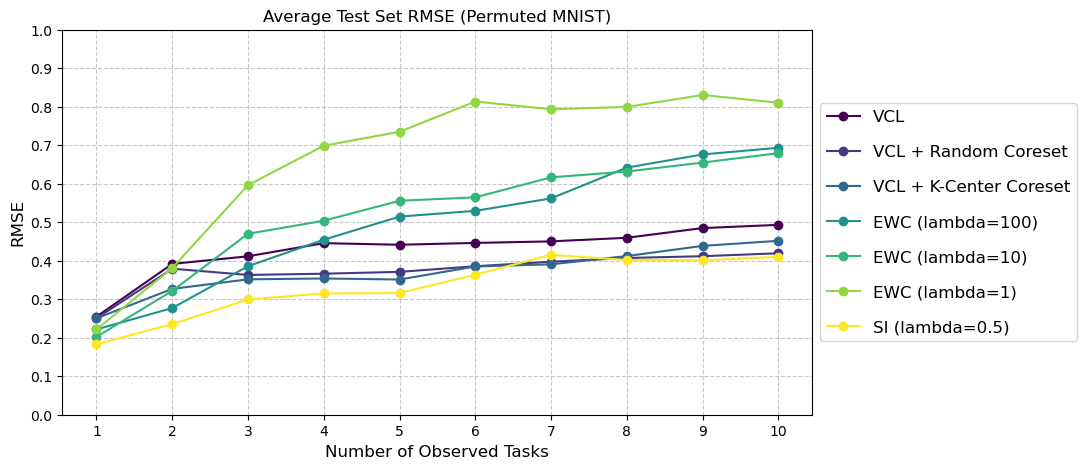

In [266]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Assuming accs is a dictionary where each key is a coreset size and the value is a list of accuracy histories
fig = plt.figure(figsize=(12, 5))  # Increase width while keeping a reasonable height

# Get the viridis colormap
viridis = cm.get_cmap('viridis', len(accs))

# Track index for color assignment
for i, (title, hist) in enumerate(accs.items()):
    # Compute the mean of each accuracy history
    acc_means = hist.mean(dim=0)

    # Ensure x is from 1 to 10 for all coreset sizes, even if there are fewer than 10 points
    x = np.arange(1, 11)

    # Plot the accuracy means with squares and dashed lines using viridis colors
    plt.plot(
        x[:len(acc_means)],
        acc_means,
        marker='s' if "Only" in title else 'o',  # Square markers
        linestyle='--' if "Only" in title else '-',  # Dashed line
        color=viridis(i),  # Use viridis color palette
        label=f'{title}'
    )

# Set x-axis to always show ticks from 1 to 10
plt.xticks(np.arange(1, 11))

# Set y-axis range from 0.8 to 1.0 with ticks at 0.05 increments
plt.ylim(0, 1.0)
plt.yticks(np.arange(0, 1.05, 0.1))

# Adjust the subplots to make room for the legend
plt.subplots_adjust(right=0.75)

# Add a legend that spans the full height of the plot
plt.legend(
    loc='center left', 
    bbox_to_anchor=(1.01, 0.5),
    borderaxespad=0,
    ncol=1,
    bbox_transform=plt.gca().transAxes,
    labelspacing=1.2,  # Increase spacing between legend entries
    fontsize=12        # <-- Set legend font size here
)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add labels and title with normal font
plt.xlabel('Number of Observed Tasks', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

# Set a clean, professional font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica', 'sans-serif']
plt.title('Average Test Set RMSE (Permuted MNIST)')


In [267]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("permuted_mnist_required_extension.pdf") as pdf:
    pdf.savefig(fig)  # Pass the figure explicitly
    plt.close(fig)
